<a href="https://colab.research.google.com/github/inhoblock/Data_science-Study/blob/main/Chapter03_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3_3

Feature engineering and Regularization

# 데이터 입력

In [1]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

df : length, height, width 세 종류의 feature.

In [2]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

# 사이킷런의 변환기 ( Transformer )

특성을 만들거나 전처리하기 위한 다양한 클래스들을 제공.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


x, y 두 개의 feature가 있다면 $x^0 y^0, x, y, x y, x^2, y^2$ 6개의 feature 생성.

사이킷런의 모델은 자동으로 절편을 추가하므로 $x^0 y^0$ 항은 특성으로서의 의미가 없음.

In [5]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


( transformer에서 fit은 모델에서의 fit 처럼 훈련을 의미하는 것은 아님 )

In [6]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)
poly.get_feature_names()

(42, 9)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

# Multiple Regression ( 다중 회귀 )

여러 개의 특성을 이용한 선형 회귀

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


여러개의 feacher를 이용하니 ch.3_2 의 under-fitting 이 해결되었다.

#feature의 개수는 많을수록 좋은가?

In [9]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(train_poly.shape)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

(42, 55)
0.9999999999991096
-144.40579242335605


55개의 feature.

매우 높은 train set의 점수.

음수가 나와버린 test set의 점수.


# Why?

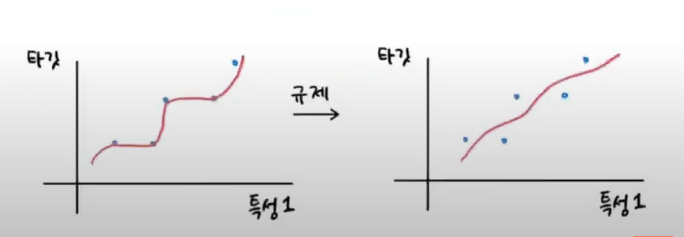

feature의 개수를 무리하게 늘려주면 과도한 over-fitting이 일어남.

# Regularization ( 규제 )

linear regression의 경우 계수들의 크기를 작게 만듬.

In [11]:
# 표준화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지 회귀

선형 회귀 + 규제

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615398


regularization 결과 over - fitting 이 해결되었다.

# 규제의 정도?
적절한 alpha 값 찾기 

In [14]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)

  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))


<function matplotlib.pyplot.show>

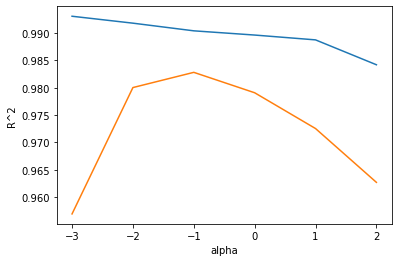

In [16]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show

alpha_list 값들을 동일한 간격으로 표현하기 위해 log함수 사용.

두 그래프가 가깝고, test set의 점수가 높은 log(alpha) = -1 이 가장 합리적으로 보임.

alpha = 0.1 

In [17]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


default값 (alpha = 1) 보다 train set, test set 점수가 높아진 것을 확인할 수 있음.

# 라쏘 회귀

릿지와 비슷하지만 계수를 0으로 만들 수 있음.

In [24]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897898972080961
0.9800593698421883


릿지와 마찬가지로 over - fitting이 해결되었다.

# 최적의 alpha 값?

In [20]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter = 10000)
  # max_iter : 필요한 계산의 반복 횟수 (중요 x)
  lasso.fit(train_scaled, train_target)

  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


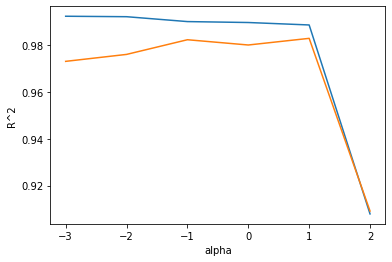

In [21]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

라쏘의 경우 default값 (alpha = 1)이 최적값임.

# [Mark]

- 라쏘는 계수를 0으로 최적화시킬 수 있음.

- 이를 이용해 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있음.

In [25]:
print(np.sum(lasso.coef_ == 0))

42


라쏘 모델 훈련 결과 55개의 특성 중 42개 특성의 계수가 0임.

15개의 특성만으로도 충분히 좋은 모델을 만들 수 있다는 의미.